<a href="https://colab.research.google.com/github/jamqu/MachineLearningSpring2022/blob/main/CSMLAs1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data set was found on Kaggle under the title "Breast Cancer Wisconsin" https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

The main reason for this dataset is to quantify different forms of breat cancer found in people within Wisconsin. The first two columns are the id of patient and their diagnosis (either m for malignant or b for benign). The next 30 columns are size categorizing data, things such as area, perimeter length, radius. These columns are separated into three groups, 10 columns are the mean value of all measurements, 10 values are the standard error, and 10 columns are the worst value found. 

This dataset was chosen as I have an interest in public health. I plan to study medical physics and join the health care field in the future. I am a machine learning novice but I suspect it will be a part of my future. 

In [ ]:
#Imports
import pandas as pd
import numpy as np
import os
import io
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import PolynomialFeatures, Normalizer
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error
from google.colab import files

sns.set_theme(style="ticks", color_codes=True)
  
  
#uploaded = files.upload()

#Read in dataset and present it
#df= pd.read_csv(io.BytesIO(uploaded['DatasetAfricaMalaria.csv']))
df: pd.DataFrame = pd.read_csv('fulldata.csv')
df.head()





,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

**Columns**

id	
diagnosis	
radius_mean	
texture_mean	
perimeter_mean	
area_mean	
smoothness_mean	
compactness_mean	
concavity_mean	
concave points_mean	
symmetry_mean	fractal_dimension_mean	
radius_se	
texture_se	
perimeter_se	
area_se	
smoothness_se	
compactness_se	
concavity_se	
concave points_se	
symmetry_se	
fractal_dimension_se	
radius_worst	
texture_worst	
perimeter_worst	
area_worst	
smoothness_worst	
compactness_worst	
concavity_worst	
concave points_worst	
symmetry_worst	
fractal_dimension_worst

#Data Analysis

In [ ]:
#dropping some of the columns that will not be used
df.drop('radius_se', axis=1, inplace=True)
df.drop('texture_se', axis=1, inplace=True)
df.drop('perimeter_se', axis=1, inplace=True)
df.drop('area_se', axis=1, inplace=True)
df.drop('smoothness_se', axis=1, inplace=True)
df.drop('compactness_se', axis=1, inplace=True)
df.drop('concavity_se', axis=1, inplace=True)
df.drop('concave points_se', axis=1, inplace=True)
df.drop('symmetry_se', axis=1, inplace=True)
df.drop('fractal_dimension_se', axis=1, inplace=True)
df.drop('radius_worst', axis=1, inplace=True)
df.drop('texture_worst', axis=1, inplace=True)
df.drop('perimeter_worst', axis=1, inplace=True)
df.drop('area_worst', axis=1, inplace=True)
df.drop('smoothness_worst', axis=1, inplace=True)
df.drop('compactness_worst', axis=1, inplace=True)
df.drop('concavity_worst', axis=1, inplace=True)
df.drop('concave points_worst', axis=1, inplace=True)
df.drop('symmetry_worst', axis=1, inplace=True)
df.drop('fractal_dimension_worst', axis=1, inplace=True)
df.drop('Unnamed: 32', axis=1, inplace=True)

df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [ ]:
df.shape
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf6c65d690>,
      dtype=object)

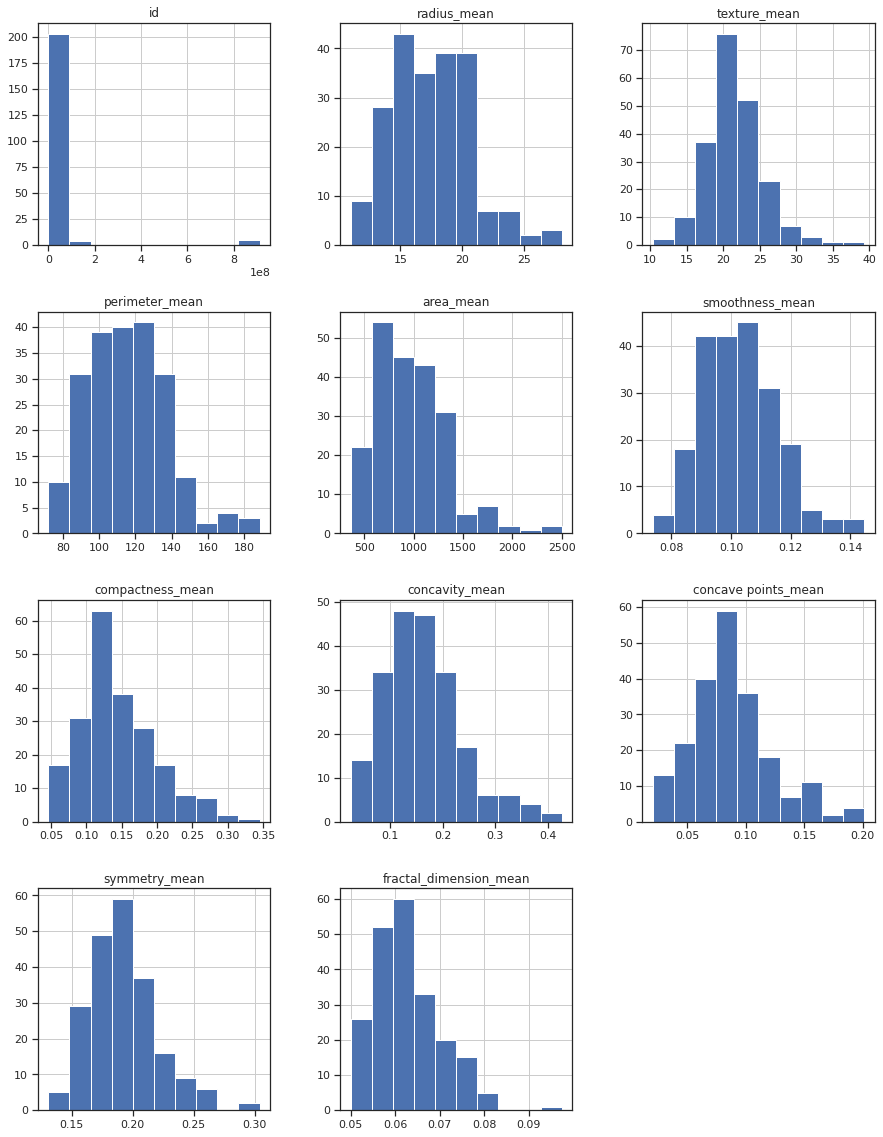

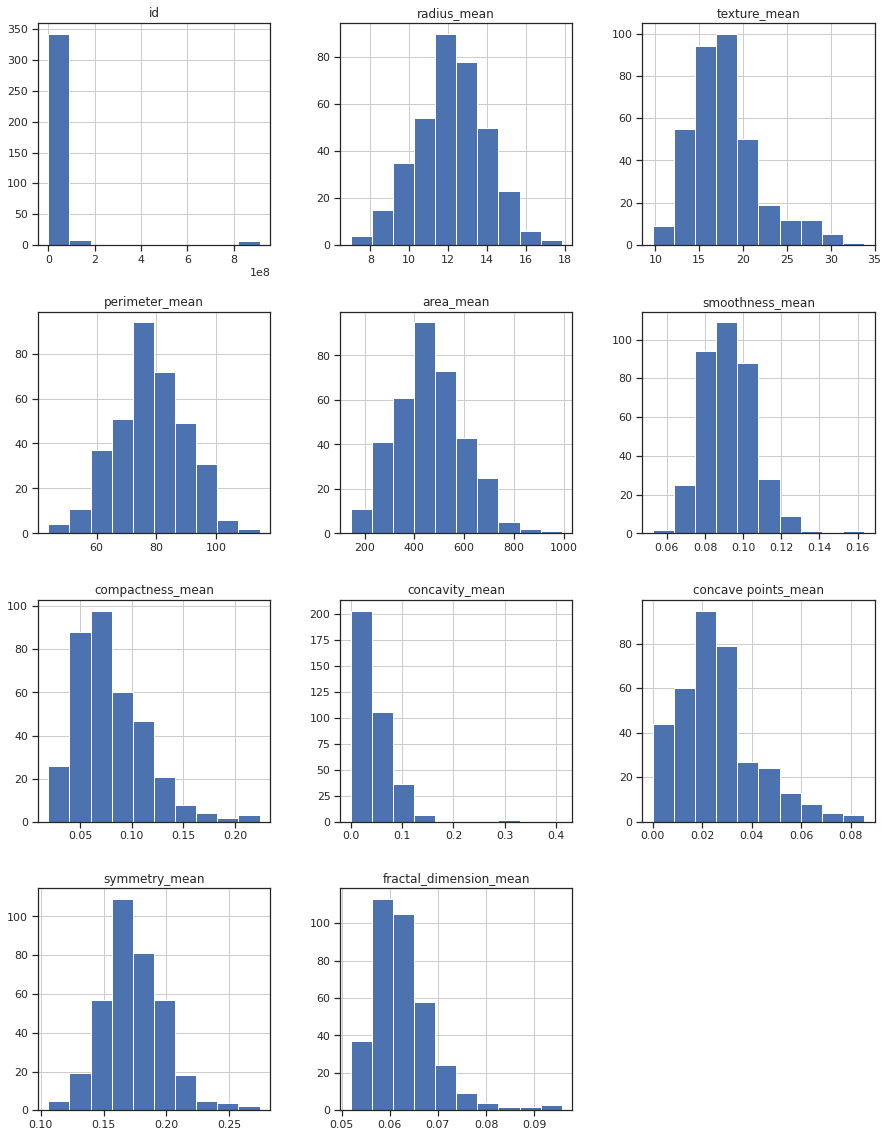

In [ ]:
fig = plt.figure(figsize = (15,20))
ax_1 = fig.gca()
fig = plt.figure(figsize = (15,20))
ax_2 = fig.gca()
#First set of plots is Malignant cancer
df[df["diagnosis"] == "M"].hist(ax=ax_1)
#Second set of plots is Benign cancer
df[df["diagnosis"] == "B"].hist(ax=ax_2)

In [ ]:
# Lets see how the diagnosis data is distrubuted. 
x = df['diagnosis'].value_counts()
print(x)
# get the percentage of Existing Customer
e = x['M'] / (x['M'] + x['B'])
print(f'% of Malignant diagnosises {e}')
# get the percentage of Attrited Customer
e = x['B'] / (x['B'] + x['M'])
print(f'% of Benign diagnosises {e}')

B    357
M    212
Name: diagnosis, dtype: int64
% of Malignant diagnosises 0.37258347978910367
% of Benign diagnosises 0.6274165202108963


37.3% of the diagnosises are malignant the other 62.7% of the diagnosises are benign, this means that if a model predicts benign every time then it will be 62.7% accurate. This will be instructive as to where the lowest value of a learning algorithm would be. 

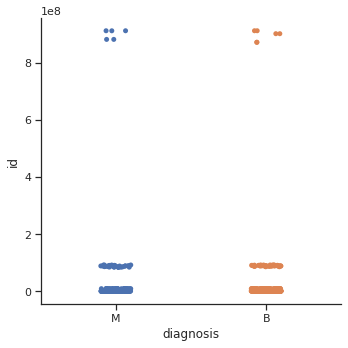

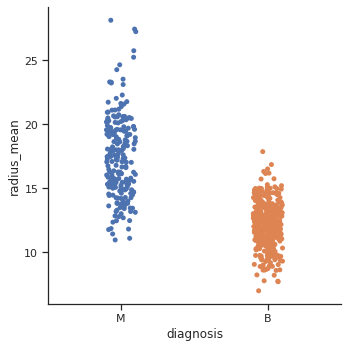

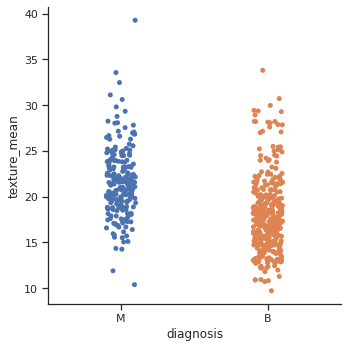

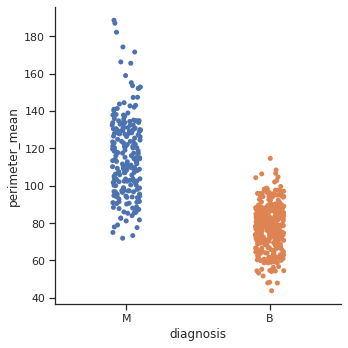

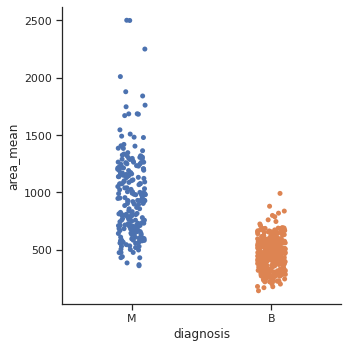

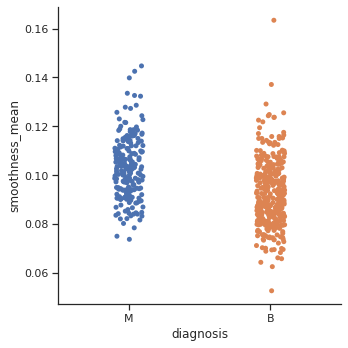

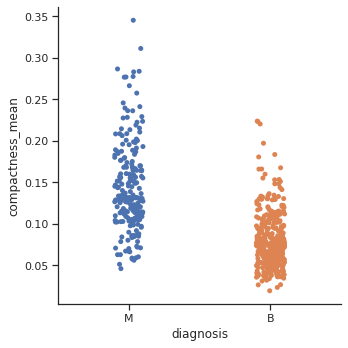

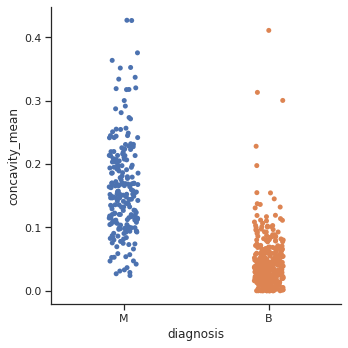

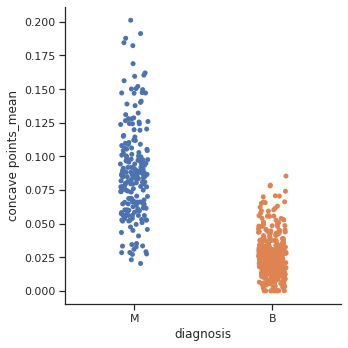

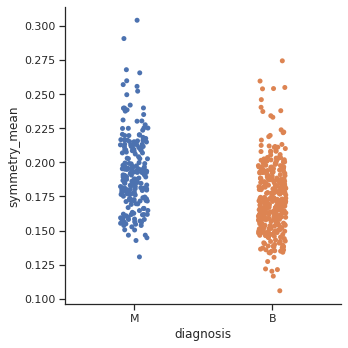

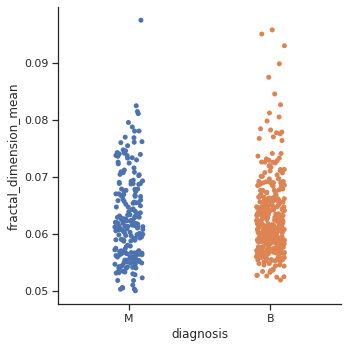

In [ ]:
# graphing Malignant or Benign vs each column
for col in df.columns:
    if not col == "diagnosis":
        sns.catplot(x="diagnosis", y=col, data=df)

# Model 1 small KNN

Making KNN model with only two values. This way we can get an idea of the decision boundary for the model

In [ ]:
# KNN with only two values

# From the graphs it looks like texture_mean and radius_mean may be good canidates 
#as there is a separation between the values of texture_mean/radius_mean that correspond to B or M
df_small = df[['radius_mean', 'texture_mean']]

Y = df.diagnosis.map({'M':1, 'B':0})
# split data
X_train, X_test, y_train, y_test = train_test_split(df_small,Y, random_state=1)

X_test.head

<bound method NDFrame.head of      radius_mean  texture_mean
421        14.69         13.98
47         13.17         18.66
292        12.95         16.02
186        18.31         18.58
414        15.13         29.81
..           ...           ...
232        11.22         33.81
413        14.99         22.11
514        15.05         19.07
244        19.40         23.50
415        11.89         21.17

[143 rows x 2 columns]>

In [ ]:
#creating model
k=5
knn_small = KNeighborsClassifier(n_neighbors=k)
knn_small.fit(X_train, y_train)

y_pred = knn_small.predict(X_test)

print("Accuracy of the KNN predictor with k=" + str(k)+": " + str(metrics.accuracy_score(y_test, y_pred)))
print(f"confusion_matrix with k={str(k)}")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy of the KNN predictor with k=5: 0.8461538461538461
confusion_matrix with k=5
[[80  8]
 [14 41]]


Text(0, 0.5, 'Testing Accuracy')

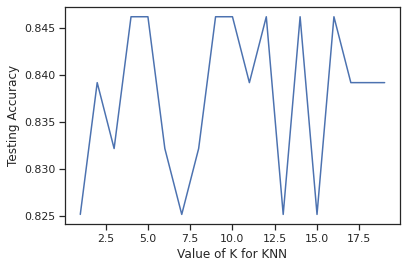

In [ ]:
# find optimal k for the small KNN model
k_range = range(1, 20)

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Judging from this graph one of the optimal k values has already been used, k=5. However there are many values that are tied for being the most optimal. This means that if I try k=10 it should result in the same testing accuracy as k=5. Let's try that now.

In [ ]:
# lets look at the metrics with k=10
k=10
knn_small = KNeighborsClassifier(n_neighbors=k)
knn_small.fit(X_train, y_train)

y_pred = knn_small.predict(X_test)
y_pred_train = knn_small.predict(X_train)

# seems to be slightly improved from when k=1
print("Train accuracy", metrics.accuracy_score(y_train, y_pred_train))
print("Test accuracy", metrics.accuracy_score(y_test, y_pred))
print(f"confusion_matrix with k={str(k)}")
print(metrics.confusion_matrix(y_test, y_pred))

Train accuracy 0.92018779342723
Test accuracy 0.8461538461538461
confusion_matrix with k=10
[[80  8]
 [14 41]]


Using small KNN with one of the optimal values results in a testing accuracy of 84.6. This is a 20% higher than if the model had predicted that every result was benign. This is surprisingly accurate for a KNN classifier with only two parameters. This suggests that radius_mean and texture_mean good indicators for the malignancy of a cancerous cell.

Now to plot a decision boundary for small KNN

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


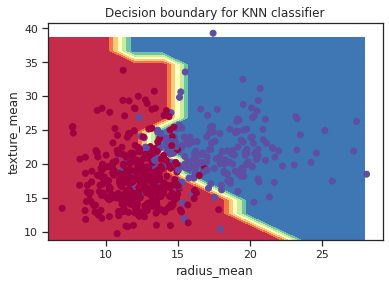

In [ ]:
k=5
knn_small = KNeighborsClassifier(n_neighbors=k)
knn_small.fit(X_train, y_train)


h = 2  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


clf = knn_small
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

x_min, x_max = df_small["radius_mean"].min() - 1, df_small['radius_mean'].max() + 1
y_min, y_max =  df_small["texture_mean"].min() - 1, df_small['texture_mean'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.ylabel('texture_mean')
plt.xlabel('radius_mean')
plt.scatter(df_small["radius_mean"], df_small["texture_mean"], c=Y, cmap=plt.cm.Spectral)

plt.title("Decision boundary for KNN classifier")

plt.show()

# Model 2 Large KNN

Now we are going to make a larger KNN model we are going to use all the possible features in our data.

In [ ]:
# get all data
numerical_categories = [x for x in df.columns if (df[x].dtype != object and x not in ["diagnosis"])] 
print(numerical_categories)
cat_df = df[numerical_categories]
cat_df.head()

['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [ ]:
# Make the training / test data
X = cat_df
Y = df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_test.head()

(426, 11)
(426,)
(143, 11)
(143,)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
421,906564,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406
47,85715,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777
292,891670,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470
186,874217,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425
414,905680,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294


In [ ]:
# make the diagnosis binary
df['diagnosis'] = df.diagnosis.map({'M':1, 'B':0})

In [ ]:
# train a KNN model for k=5
k=5
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

print("Accuracy of the larger KNN predictor with k=" + str(k)+": " + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the larger KNN predictor with k=5: 0.7622377622377622


In [ ]:
k=10
knn = KNeighborsClassifier(n_neighbors=k)

# train the model
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy of the larger KNN predictor with k=" + str(k)+": " + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the larger KNN predictor with k=10: 0.7412587412587412


We lost accuracy by adding all of the other parameters to our KNN model. 
But what if we try scaling the data

In [ ]:
X = cat_df
Y = df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=1)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# train a NKK model for k=5
k=5
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy of the larger KNN predictor with scaled data and with k=" + str(k)+": " + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the larger KNN predictor with scaled data and with k=5: 0.9440559440559441


By scaling the data the accuracy improved from 79.7% to 94.4%

Scaling was performed using the standard scaler, which is done using the below formula.

$$
x_{new} = \dfrac{x-\mu}{\sigma}
$$

In [ ]:
# lets see what our optimal k is
k_range = range(1, 26)

scores = []

# We use a loop through the range 1 to 26
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)
_max = max(scores)
print(f"the max score is {_max}")
print(f"the best k value  is {scores.index(_max)+1}")


[0.8741258741258742, 0.9020979020979021, 0.9370629370629371, 0.9440559440559441, 0.9440559440559441, 0.9300699300699301, 0.951048951048951, 0.9300699300699301, 0.9440559440559441, 0.958041958041958, 0.958041958041958, 0.951048951048951, 0.9440559440559441, 0.9370629370629371, 0.9440559440559441, 0.951048951048951, 0.9440559440559441, 0.9370629370629371, 0.9300699300699301, 0.9370629370629371, 0.9440559440559441, 0.9370629370629371, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441]
the max score is 0.958041958041958
the best k value  is 10


Text(0, 0.5, 'Testing Accuracy')

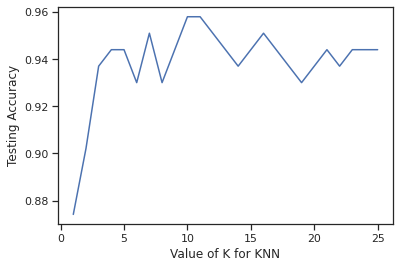

In [ ]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

By both adding more features and scaling the data the accuracy of the KNN model is improved quite a lot. 

In [ ]:
# train with the optimal K found above
k = 10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

print("Train accuracy", metrics.accuracy_score(y_train, y_pred_train))
print("Test accuracy", metrics.accuracy_score(y_test, y_pred))
print(f"confusion_matrix with k={str(k)}")
print(metrics.confusion_matrix(y_test, y_pred))

Train accuracy 0.9530516431924883
Test accuracy 0.958041958041958
confusion_matrix with k=10
[[87  1]
 [ 5 50]]


The accuracy of the testing is 95.8 which is an excellent improvement over the first smallKNN model. Both false negatives and positives have been reduced with false positives being reduced from 8 to 1 from small KNN to this model and false negatives falling from 14 to 5. 

# Model 3 Decision Tree

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    int64  
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 53.5 KB


In [ ]:
#selecting data and removing columns that don't have any analytical use

X = df.drop('diagnosis',axis=1)
X = X.drop('id',axis=1)
Y = df[['diagnosis']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1)

In [ ]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,Y_train)

Y_predict = clf_model.predict(X_test)
accuracy_score(Y_test,Y_predict)

0.9230769230769231

['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


[Text(0.4342105263157895, 0.9, 'X[8] <= 0.01\ngini = 0.465\nsamples = 426\nvalue = [269, 157]'),
 Text(0.21052631578947367, 0.7, 'X[1] <= 0.259\ngini = 0.089\nsamples = 258\nvalue = [246, 12]'),
 Text(0.10526315789473684, 0.5, 'X[8] <= -0.461\ngini = 0.04\nsamples = 245\nvalue = [240, 5]'),
 Text(0.05263157894736842, 0.3, 'gini = 0.0\nsamples = 191\nvalue = [191, 0]'),
 Text(0.15789473684210525, 0.3, 'X[0] <= -0.247\ngini = 0.168\nsamples = 54\nvalue = [49, 5]'),
 Text(0.10526315789473684, 0.1, 'gini = 0.388\nsamples = 19\nvalue = [14, 5]'),
 Text(0.21052631578947367, 0.1, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(0.3157894736842105, 0.5, 'X[0] <= -0.247\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2631578947368421, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.3684210526315789, 0.3, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.6578947368421053, 0.7, 'X[2] <= -0.675\ngini = 0.236\nsamples = 168\nvalue = [23, 145]'),
 Text(0.5263157894736842, 0.5,

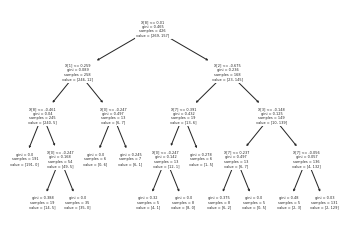

In [ ]:
target = list(df['diagnosis'].unique())
feature_names = list(X.columns)
print(feature_names)
from sklearn import tree
import graphviz
# dot_data = tree.export_graphviz(clf_model,
#                                 out_file=None, 
#                       feature_names=feature_names,  
#                       class_names=target,  
#                       filled=True, rounded=True,  
#                       special_characters=True)  
# graph = graphviz.Source(dot_data)  

#graph
tree.plot_tree(clf_model)

In [ ]:
from sklearn.tree import export_text
r = export_text(clf_model, feature_names=feature_names)
print(r)

|--- concave points_mean <= 0.05
|   |--- radius_mean <= 15.05
|   |   |--- concave points_mean <= 0.03
|   |   |   |--- class: 0
|   |   |--- concave points_mean >  0.03
|   |   |   |--- texture_mean <= 24.57
|   |   |   |   |--- compactness_mean <= 0.07
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- compactness_mean >  0.07
|   |   |   |   |   |--- class: 0
|   |   |   |--- texture_mean >  24.57
|   |   |   |   |--- class: 0
|   |--- radius_mean >  15.05
|   |   |--- texture_mean <= 18.84
|   |   |   |--- class: 0
|   |   |--- texture_mean >  18.84
|   |   |   |--- class: 1
|--- concave points_mean >  0.05
|   |--- texture_mean <= 16.39
|   |   |--- concavity_mean <= 0.12
|   |   |   |--- concave points_mean <= 0.06
|   |   |   |   |--- class: 0
|   |   |   |--- concave points_mean >  0.06
|   |   |   |   |--- class: 0
|   |   |--- concavity_mean >  0.12
|   |   |   |--- class: 1
|   |--- texture_mean >  16.39
|   |   |--- perimeter_mean <= 88.25
|   |   |   |--- concavity_me

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[87  1]
 [ 5 50]]


The decision tree had an accuracy of 91.6. Slightly less than large KNN, at first glance is a impressive result from this decision tree. What is not taken into account is that the data is already the mean values taken from actual measurements. This decision tree then takes those mean values and finds the mean and standard error of those values in order to assign paths in the decision tree. This process may have warped the dataset and left the results of this decision tree to be fairly meaningless.

#Model 4 Logistic Regression

In [ ]:
#using X and y from decision tree

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1)
print(X_train.head())
print(Y_train.head())

# we saw previously that scaling gave better results so it is done immediately
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
562        15.22         30.62          103.40      716.9          0.10480   
291        14.96         19.10           97.03      687.3          0.08992   
16         14.68         20.13           94.74      684.5          0.09867   
546        10.32         16.35           65.31      324.9          0.09434   
293        11.85         17.46           75.54      432.7          0.08372   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
562           0.20870         0.25500             0.094290         0.2128   
291           0.09823         0.05940             0.048190         0.1879   
16            0.07200         0.07395             0.052590         0.1586   
546           0.04994         0.01012             0.005495         0.1885   
293           0.05642         0.02688             0.022800         0.1875   

     fractal_dimension_mean  
562                 0.07152  
291     

In [ ]:
#Making model
lgr = LogisticRegression(solver='liblinear')
lgr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = lgr.predict(X_test)
y_pred_train = lgr.predict(X_train)
print("Train accuracy", metrics.accuracy_score(y_train, y_pred_train))
print("Test accuracy", metrics.accuracy_score(y_test, y_pred))
print(f"confusion_matrix")
print(metrics.confusion_matrix(y_test, y_pred))

Train accuracy 0.9413145539906104
Test accuracy 0.9370629370629371
confusion_matrix
[[85  3]
 [ 6 49]]


In [ ]:
# print the intercept and coefficients
print(lgr.intercept_)
print(lgr.coef_)

[-0.56019792]
[[ 1.04846437  1.29857612  0.95701992  1.23470313  0.67264682  0.02404812
   0.99802606  1.35233028  0.48228201 -0.53529399]]


In [ ]:
# pair the feature names with the coefficients
list(zip(X.columns, lgr.coef_[0]))

[('radius_mean', 1.0484643728756473),
 ('texture_mean', 1.2985761211736924),
 ('perimeter_mean', 0.9570199180780946),
 ('area_mean', 1.234703129818945),
 ('smoothness_mean', 0.6726468181921438),
 ('compactness_mean', 0.024048119158942217),
 ('concavity_mean', 0.9980260550877236),
 ('concave points_mean', 1.3523302846122431),
 ('symmetry_mean', 0.4822820116947988),
 ('fractal_dimension_mean', -0.5352939860543581)]

Based on the coefficients it seems that most of the columns do help the accuracy of the model. The column 'compactness_mean' does not help much so let's remove it and test the results.

In [ ]:
X = X.drop('compactness_mean',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# train model
lgr_new = LogisticRegression(solver='liblinear')
lgr_new.fit(X_train, y_train)
y_pred = lgr_new.predict(X_test)
y_pred_train = lgr_new.predict(X_train)
print("Train accuracy", metrics.accuracy_score(y_train, y_pred_train))
print("Test accuracy", metrics.accuracy_score(y_test, y_pred))
print(f"confusion_matrix")
print(metrics.confusion_matrix(y_test, y_pred))

Train accuracy 0.9413145539906104
Test accuracy 0.9370629370629371
confusion_matrix
[[85  3]
 [ 6 49]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


This has literally no effect on the model suggesting that compactness_mean did not mean anything to our model.

#Adding polynomial features 

doing degree 1
[0.9370629370629371]
doing degree 2
[0.9370629370629371, 0.951048951048951]
doing degree 3
[0.9370629370629371, 0.951048951048951, 0.951048951048951]
doing degree 4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.9370629370629371, 0.951048951048951, 0.951048951048951, 0.9370629370629371]
doing degree 5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.9370629370629371, 0.951048951048951, 0.951048951048951, 0.9370629370629371, 0.9370629370629371]
doing degree 6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.9370629370629371, 0.951048951048951, 0.951048951048951, 0.9370629370629371, 0.9370629370629371, 0.9370629370629371]
doing degree 7
[0.9370629370629371, 0.951048951048951, 0.951048951048951, 0.9370629370629371, 0.9370629370629371, 0.9370629370629371, 0.9440559440559441]
doing degree 8


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.9370629370629371, 0.951048951048951, 0.951048951048951, 0.9370629370629371, 0.9370629370629371, 0.9370629370629371, 0.9440559440559441, 0.9370629370629371]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Text(0, 0.5, 'Testing Accuracy')

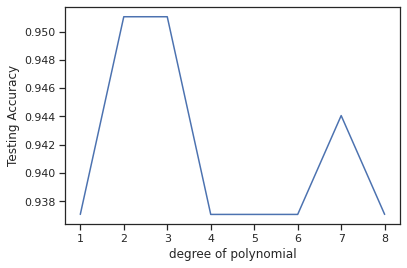

In [ ]:
scores = []
# tried to 15 but it took a long time and the testing-accuracy did not get higher than at 2 or 3

degree_range = range(1,9)



for d in degree_range:
    print('doing degree',d)
    poly = PolynomialFeatures(degree=d)
    X_train_tansformed = poly.fit_transform(X_train)
    X_test_tansformed = poly.fit_transform(X_test)

    poly_lgr = LogisticRegression(solver='liblinear')
    poly_lgr.fit(X_train_tansformed, y_train)
    y_pred = poly_lgr.predict(X_test_tansformed)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    print(scores)

%matplotlib inline

plt.plot(degree_range, scores)
plt.xlabel('degree of polynomial')
plt.ylabel('Testing Accuracy')

The best degree is 2 or 3

In [ ]:
#  lets use that to report how well our model did
# data prep

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
poly = PolynomialFeatures(degree=3)
X_train_tansformed = poly.fit_transform(X_train)
X_test_tansformed = poly.fit_transform(X_test)

# model train
poly_lgr = LogisticRegression(solver='liblinear')
poly_lgr.fit(X_train_tansformed, y_train)
# results
y_pred = poly_lgr.predict(X_test_tansformed)
y_pred_train = poly_lgr.predict(X_train_tansformed)
print("Train accuracy", metrics.accuracy_score(y_train, y_pred_train))
print("Test accuracy", metrics.accuracy_score(y_test, y_pred))
print(f"confusion_matrix")
print(metrics.confusion_matrix(y_test, y_pred))

Train accuracy 0.9835680751173709
Test accuracy 0.951048951048951
confusion_matrix
[[85  3]
 [ 4 51]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


This model is almost as good as the large KNN model, less than 1% accuracy in difference. The model also fits quite well which suggests that it is not over or underfitting.

In [ ]:
# compare all results
# use k-fold validation

# data prep
X_train, X_test, y_train, y_test = train_test_split(X, df["diagnosis"], test_size=0.4, random_state=1)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=1)

# KNN

k=10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

scores = cross_val_score(knn, X_val, y_val, cv=10, scoring='accuracy')

print(f"Cross validtion score for KNN {scores.mean()}")

# LogisticRegression 

poly = PolynomialFeatures(degree=3)
X_train_tansformed = poly.fit_transform(X_train)
X_test_tansformed = poly.fit_transform(X_test)
X_val_tansformed = poly.fit_transform(X_val)

poly_lgr = LogisticRegression(solver='liblinear')
poly_lgr.fit(X_train_tansformed, y_train)

scores = cross_val_score(poly_lgr, X_val_tansformed, y_val, cv=10, scoring='accuracy')

print(f"Cross validtion score for LogisticRegression {scores.mean()}")



# Tree

dtc = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5) 
dtc.fit(X_train, y_train)


scores = cross_val_score(dtc, X_val, y_val, cv=10, scoring='accuracy')

print(f"Cross validtion score for DecisionTreeClassifier is {scores.mean()}")



Cross validtion score for KNN 0.95359477124183
Cross validtion score for LogisticRegression 0.9359477124183007
Cross validtion score for DecisionTreeClassifier is 0.9065359477124183


In [ ]:

# looks like out best model is the scaled version of large KNN so lets report the accuracy
X = cat_df
Y = df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=1)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# train with the optimal K found above
k = 10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)


print('the final accuracy of our best model is', str(metrics.accuracy_score(y_test, y_pred)))

the final accuracy of our best model is 0.958041958041958


The best model was the scaled version of large KNN. Overall this dataset is fairly easy to deal with. As can be seen in the histograms there are a few categories that are clear indicators of the presence of malignant or benign cancer cells. The radius_mean is shows that the larger a cell is the higher chance that the cell is in fact malignant. Those early histograms that I made give a good indication that any model applied to this dataset should be expected to have a high accuracy. The low results of the unscaled large KNN can be attributed to the fact that some of the features are not overly meaningful meaning that they introduce a lot of noise. Even with that noise the accuracy was 13% higher than if the model just guessed benign everytime. This shows the value of scaling the data in this case.